### 在单变量数据中找出异常点

在单变量数据中检测异常点的方法  
* 绝对中位差  
* 平均值加或减3倍标准差

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 100
fraction_of_outliers = 0.1
number_inliers = int((1-fraction_of_outliers)*n_samples)
number_outliers = n_samples - number_inliers

In [2]:
# 划分完数据集后进行数据的采集，从正态分布中采集
normal_data = np.random.randn(number_inliers,1)

In [3]:
# 打印输出平均值和标准差来确认输入数据的状态
mean = np.mean(normal_data,axis=0)
std = np.std(normal_data,axis=0)
print 'mean = (%0.2f) and Standard Deviation (%0.2f)' % (mean[0],std[0])

mean = (0.00) and Standard Deviation (0.99)


In [4]:
# 创建异常点数据
outlier_data = np.random.uniform(low=-9,high=9,size=(number_outliers,1))
total_data = np.r_[normal_data,outlier_data]
print 'size of input data = (%d,%d)' % (total_data.shape)

size of input data = (100,1)


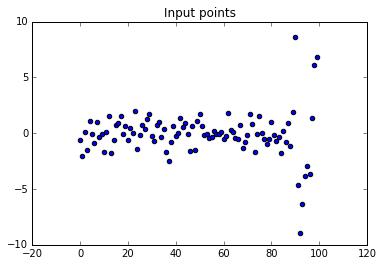

In [5]:
# 将数据绘制在图
plt.cla()
plt.figure(1)
plt.title('Input points')
plt.scatter(range(len(total_data)),total_data,c='b')
plt.show()

In [6]:
# 从绝对中位差开始，绘出数据图，并将数据异常点标记为红色
# 采用绝对中位差来检测数据里的异常点
median = np.median(total_data)
b = 1.4826
# np.abs 计算数组各元素的绝对值
mad = b*np.median(np.abs(total_data - median))

In [7]:
outliers = []
outlier_index = []
print 'median absolute Deviation = %0.2f' % mad

median absolute Deviation = 1.12


In [9]:
lower_limit = median - (3*mad)
upper_limit = median + (3*mad)
print 'lower limit = %0.2f,upper limit = %0.2f'% (lower_limit,upper_limit)
for i in range(len(total_data)):
    if total_data[i]>upper_limit or total_data[i]<lower_limit:
        print 'outliers %0.2f'%(total_data[i])
        outliers.append(total_data[i])
        outlier_index.append(i)

lower limit = -3.43,upper limit = 3.29
outliers 8.59
outliers -4.61
outliers -8.94
outliers -6.31
outliers -3.82
outliers -3.64
outliers 6.10
outliers 6.81


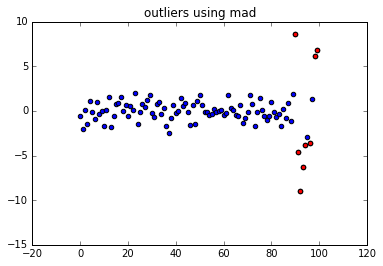

In [10]:
# plot 
plt.figure(2)
plt.title('outliers using mad')
plt.scatter(range(len(total_data)),total_data,c='b')
plt.scatter(outlier_index,outliers,c='r')
plt.show()

lower limit = -6.25,upper limit = 6.11
outliner 8.59
outliner -8.94
outliner -6.31
outliner 6.81


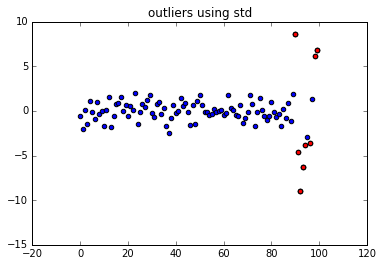

In [11]:
# 平均值 + 1 3*标准差
std = np.std(total_data)
mean = np.mean(total_data)
b =3
lower_limit = mean - b*std
upper_limit = mean + b*std

print 'lower limit = %0.2f,upper limit = %0.2f'%(lower_limit,upper_limit)
for i in range(len(total_data)):
    if total_data[i]<lower_limit or total_data[i]>upper_limit:
        print 'outliner %0.2f'% total_data[i]
        outliers.append(total_data[i])
        outlier_index.append(i)
        
plt.figure(3)
plt.title('outliers using std')
plt.scatter(range(len(total_data)),total_data,c='b')
plt.scatter(outlier_index,outliers,c='r')
plt.show()